# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО: Потёмкина Алёна Александровна

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [174]:
from sklearn.datasets import fetch_openml
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


In [4]:
print(mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [5]:
mnist.data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [6]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42)

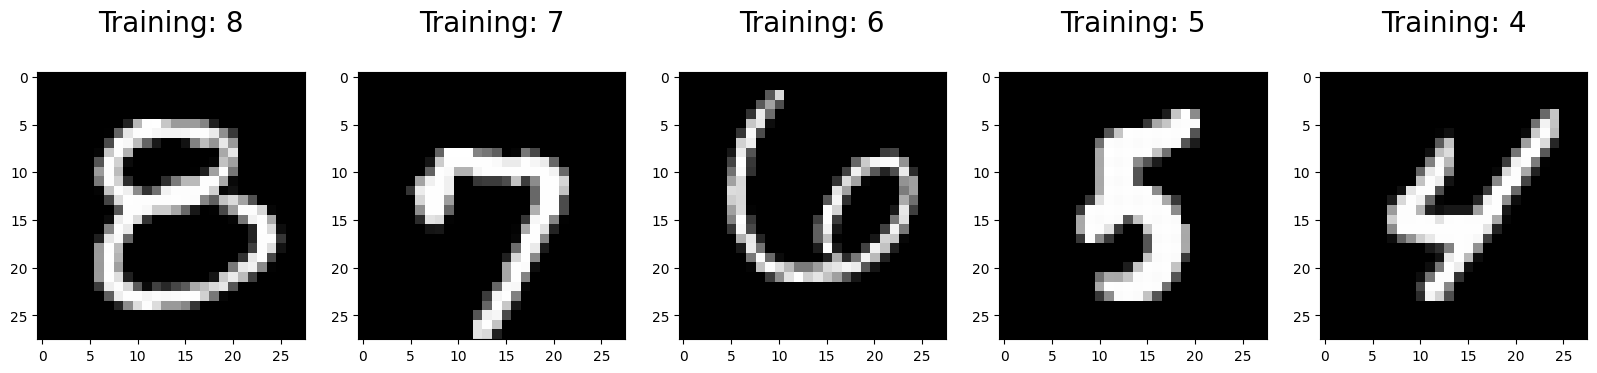

In [8]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

Начнём с логистической регрессиии

In [9]:
%%time

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10).fit(X_train, y_train)
#ваш код здесь

CPU times: user 11.6 s, sys: 973 ms, total: 12.6 s
Wall time: 6.78 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
clf.score(X_test, y_test)

0.8845714285714286

In [11]:
%%time

from sklearn import linear_model 
reg = linear_model.Ridge(alpha=.5)
reg = reg.fit (X_train, y_train) 
reg.score(X_test, y_test)

CPU times: user 3.08 s, sys: 747 ms, total: 3.82 s
Wall time: 3.08 s


0.586964950252183

In [12]:
%%time


reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso = reg_lasso.fit(X_train, y_train)

CPU times: user 23.6 s, sys: 3.2 s, total: 26.8 s
Wall time: 15.7 s


In [13]:
reg_lasso.score(X_test, y_test)

0.6195731746880713

In [14]:
print(clf)

LogisticRegression(max_iter=10, random_state=0)


**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [15]:
X_traink1, X_testk1, y_traink1, y_testk1 = train_test_split(
    mnist.data,
    mnist.target,
    test_size=0.1,
    stratify=mnist.target,
    random_state=0,
)

In [16]:
#ваш код здесь
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_traink1, y_traink1)


KNeighborsClassifier()

In [26]:
pred = knn.predict(X_testk1)
print(pred)
knn.score(X_test, y_test)

['6' '6' '8' ... '1' '8' '6']


0.9797142857142858

In [25]:
knn.score(X_testk1, y_testk1)

0.9728571428571429

In [18]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=10 ,
                               oob_score=True,
                               random_state=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=1)

In [23]:
model.score(X_test, y_test)

0.879644129148874

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [40]:
clf.score(X_test, y_test)


0.7105714285714285

In [ ]:
conf_matrix = confusion_matrix(y_test,res)

**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

![image.png](attachment:image.png)

Во-первых,нельзя вслепую использовать любые метрики, не только accuracy. Как минимум accuracy неэффективна в случае несбалансированности классов, так как по доминирующему классу, занимающему половину данных, может быть попадание 100%, а по остальным 0% и в среднем будет 50%. 

In [ ]:
#ваше обоснование

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

Причина, по которой модель случайного леса работает так хорошо, заключается в том, что: Большое число относительно некоррелированных деревьев, работающих совместно, будет превосходить любую из их отдельных составляющих. Ключевым фактором является слабая корреляция между деревьями.
КНН просто разбивает на n классов выборку.
По идее бустинг должен быть лучше, НО он обучается дольше и если выдавать случайному лесу и бустингу одинаковое время, то случайный лес выигрывает.

In [28]:
!pip install catboost
from catboost import CatBoostRegressor, Pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.0 MB/s eta 0:00:00


Да, этого не было в задании, но хочу попробовать катбуст

In [31]:
clf = CatBoostRegressor(loss_function='MAPE')  
train_dataset = Pool(data=X_train,
                     label=y_train,
                     )
    
#eval_dataset = Pool(data=X_val,
 #                   label=y_val,
 #                   )
    
clf.fit(train_dataset,
          use_best_model=True,
          verbose = 0,
         )

You should provide test set for use best model. use_best_model parameter has been switched to false value.


In [33]:
clf.score(X_test, y_test)

0.7654771925521007

Воооот оно! Катбуст лучше буста

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

# Cлучайный лес

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#rf = RandomForestClassifier(n_estimators = 200, max_depth = 7, max_features = 'sqrt',random_state = 18, criterion = 'gini').fit(x_train, y_train)
## Predict your test set on the trained model
#prediction = rf.predict(x_test)
res =  model.predict(X_test).round()
print(res, y_test)
yt1 = y_test.astype("float")
conf_matrix = confusion_matrix(yt1,res)
print(conf_matrix)


[8. 5. 6. ... 5. 2. 6.] ['8' '4' '8' ... '5' '2' '6']
[[523  77  44  21  10   6   1   0   1   0]
 [  0 700  68  16  12   2   2   0   0   0]
 [  0   9 454 121  54  19  13   4   0   0]
 [  0   0  18 526 150  40  17   6   2   1]
 [  0   0   0   8 482  57  45  14   4   1]
 [  0   2   4  15  67 477  79  11   3   0]
 [  0   1   2   3  20  68 579   4   0   0]
 [  0   0   4   7  20  25  78 567  20   3]
 [  0   2   1   5  29  40  93 178 344   1]
 [  1   0   2   1  12  15  38  37 156 458]]


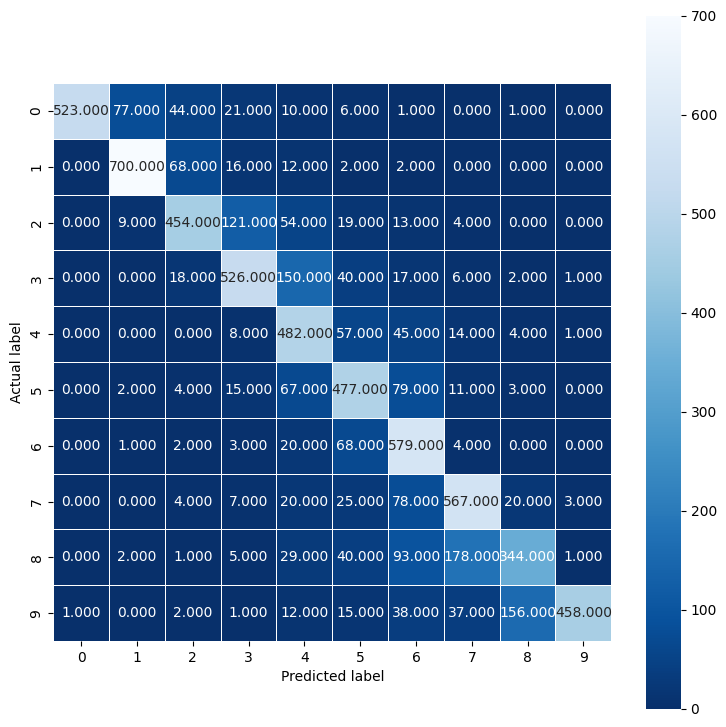

In [50]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#Бустинг

['8' '4' '5' ... '5' '2' '2'] ['8' '4' '8' ... '5' '2' '6']
[[616   0  10   8   2  28   8   2   9   0]
 [  0 750  12   5   0  13   2   0  18   0]
 [ 17  24 510  30  13   9  31  11  29   0]
 [ 10   7  45 582   5  41   6   7  27  30]
 [  3   7  13   6 489  17  15  18  10  33]
 [ 15  19  15  64  34 439  13   3  38  18]
 [ 27   4  70   8  62  43 414  22  27   0]
 [ 11  15  20  33  54   9   8 303  15 256]
 [  7  32  24  45  13  32  12   7 486  35]
 [ 10  13  12  21  65  18   2 161  33 385]]


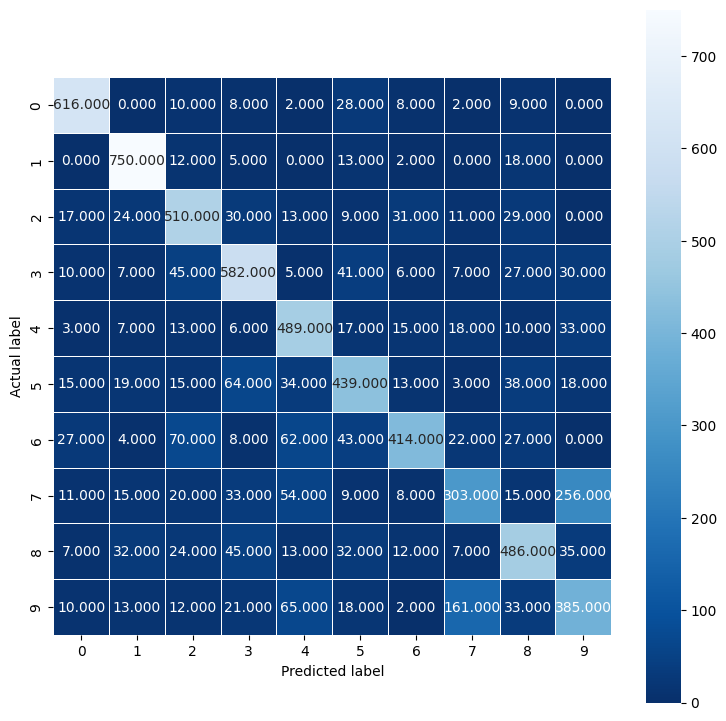

In [55]:
res =  clf.predict(X_test)

print(res, y_test)
yt1 = y_test.astype("float")
res = res.astype("float")
conf_matrix = confusion_matrix(yt1,res)
print(conf_matrix)
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#КНН и ТНН

['8' '4' '8' ... '5' '2' '6'] ['8' '4' '8' ... '5' '2' '6']
[[680   0   1   0   0   0   1   0   1   0]
 [  0 796   2   0   0   1   0   0   0   1]
 [  1   7 662   0   1   0   0   2   1   0]
 [  0   1   6 742   0   3   0   1   3   4]
 [  0   2   1   0 599   0   0   2   0   7]
 [  0   1   0   6   0 648   3   0   0   0]
 [  2   0   0   0   2   3 670   0   0   0]
 [  0  11   3   0   0   0   0 707   0   3]
 [  1   9   1  12   2   5   4   4 653   2]
 [  1   4   0   2   4   0   0   7   1 701]]


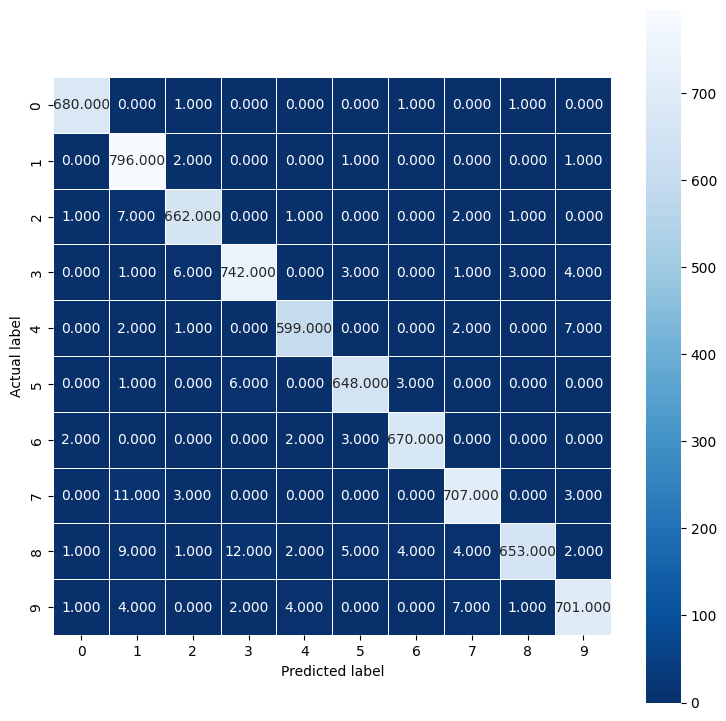

In [56]:
res =  knn.predict(X_test)

print(res, y_test)
yt1 = y_test.astype("float")
res = res.astype("float")
conf_matrix = confusion_matrix(yt1,res)
print(conf_matrix)
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Понижаем размерность

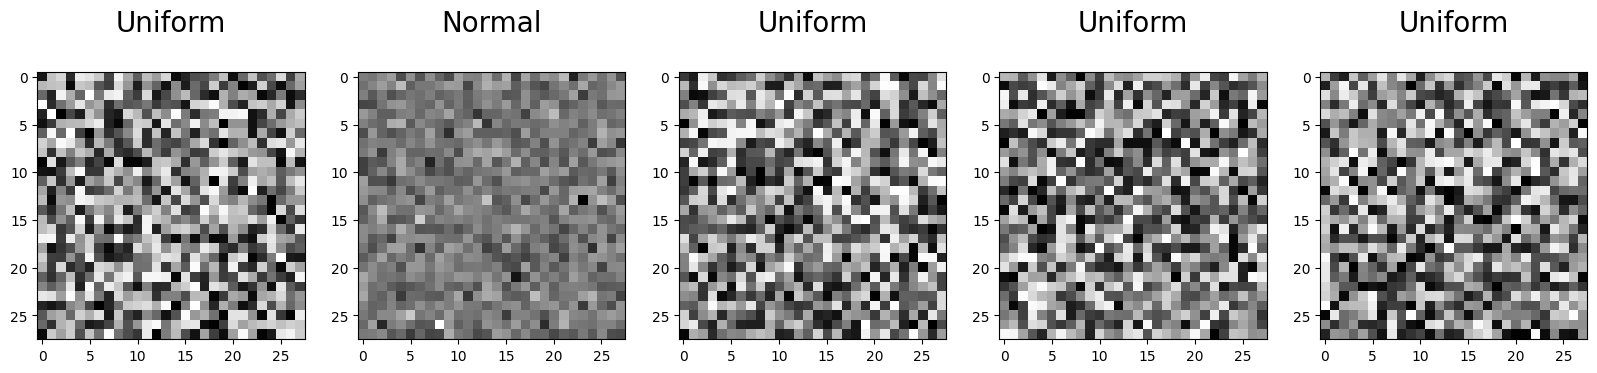

In [57]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [60]:
from sklearn.manifold import TSNE
tsne_representation = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(X_train[:2000])

In [133]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train[:2000]

In [134]:
print(len(tsne_representation))

2000


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

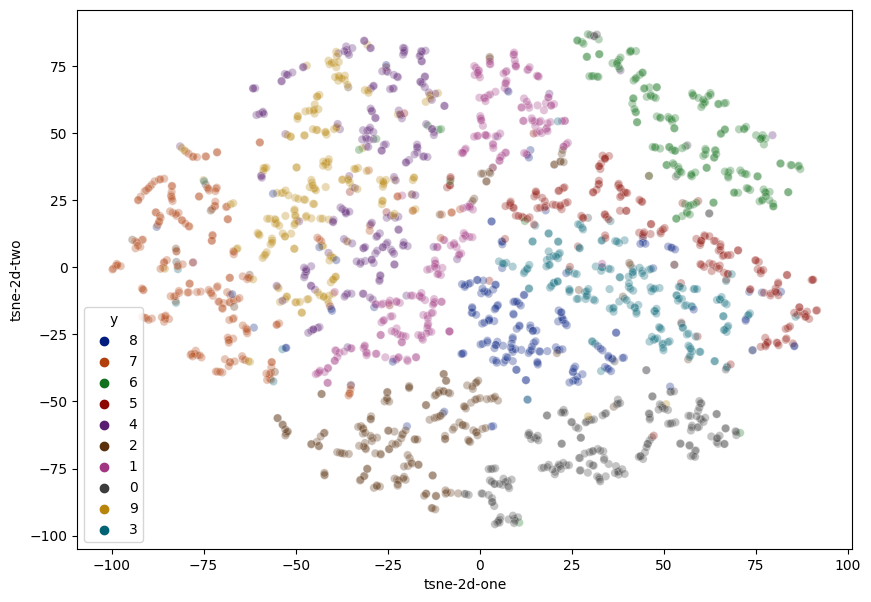

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [80]:
from sklearn.decomposition import PCA
pca_representation = PCA(n_components=2, 
                   ).fit_transform(X_train[:2000])

#pca_representation = #ваш код здесь
print(pca_representation)

[[ 461.10993536 -307.78460296]
 [ 257.14146745  976.0098207 ]
 [-113.00658993  -56.57447867]
 ...
 [ 161.77472657 -532.20389724]
 [-534.16448475  317.58963518]
 [  -1.77892178 1084.8218879 ]]


<Axes: xlabel='pca-2d-one', ylabel='pca-2d-two'>

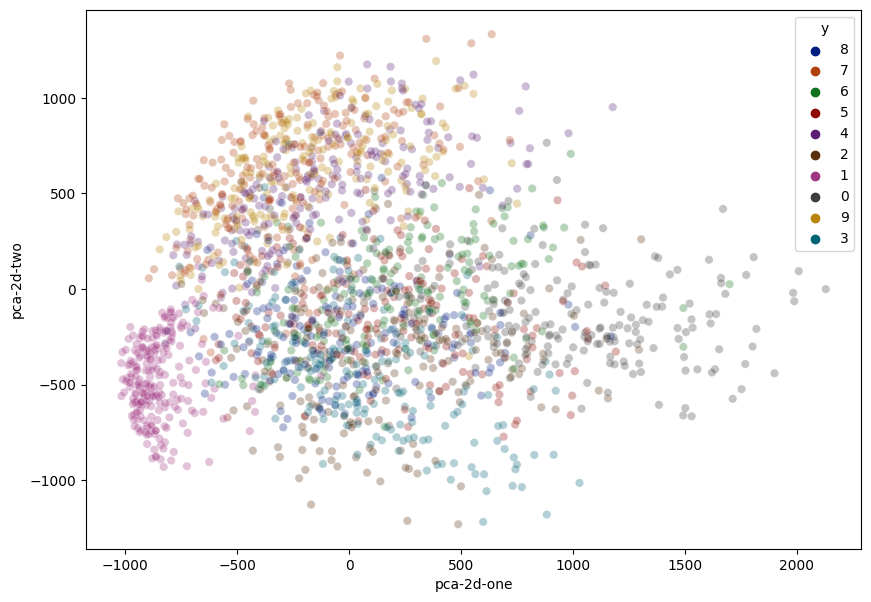

In [81]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [82]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,85.366920,-29.236471,8
1,-80.773529,17.360222,7
2,10.725829,-95.133163,6
3,64.882362,6.183606,5
4,-47.186344,-1.612594,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [128]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X_train[:2000])
dbscan_repr = DBSCAN(eps=1, min_samples=55).fit(X)
print(dbscan_repr)

DBSCAN(eps=1, min_samples=55)


**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

0       DBSCAN(eps=1, min_samples=55)
1       DBSCAN(eps=1, min_samples=55)
2       DBSCAN(eps=1, min_samples=55)
3       DBSCAN(eps=1, min_samples=55)
4       DBSCAN(eps=1, min_samples=55)
                    ...              
1995    DBSCAN(eps=1, min_samples=55)
1996    DBSCAN(eps=1, min_samples=55)
1997    DBSCAN(eps=1, min_samples=55)
1998    DBSCAN(eps=1, min_samples=55)
1999    DBSCAN(eps=1, min_samples=55)
Name: dbscan, Length: 2000, dtype: object


<ipython-input-129-3dde6f29efb6>:4: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

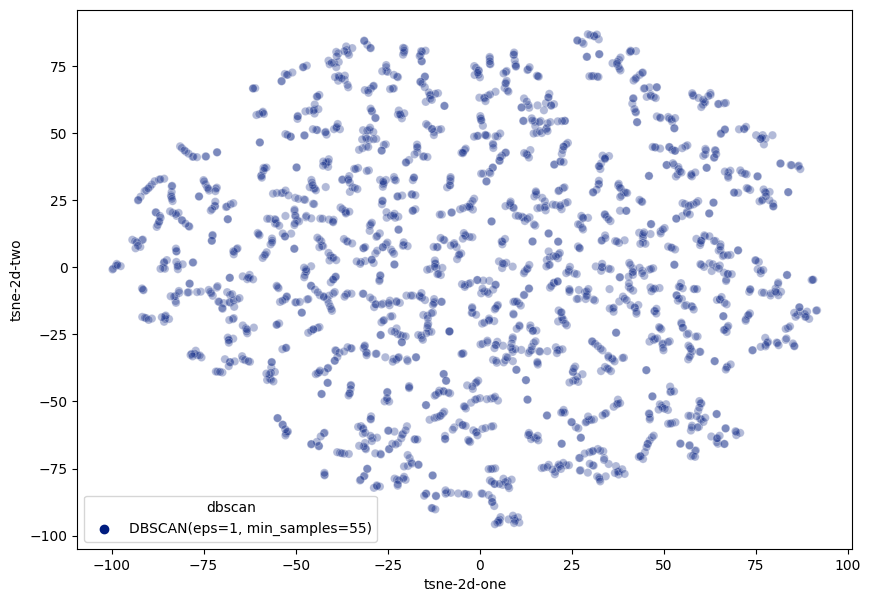

In [129]:
tsne_repr["dbscan"] = dbscan_repr
print(tsne_repr["dbscan"])
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [ ]:
#ваш код, графики и выводы здесь

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

Метод понижения размерности НЕ дал выигрыш, возможно дело в гиперпараметрах. Так или иначе, полная размерность дала большую точность

In [150]:

NewTrain = pca_representation
from sklearn.decomposition import PCA
NewTrain = PCA(n_components=2, 
                   ).fit_transform(X_train)

#pca_representation = #ваш код здесь
print(pca_representation)

[[  450.25005629  -394.2535114 ]
 [  282.16655143   912.18309322]
 [ -134.80949638   -34.80080158]
 ...
 [ -979.03304784  -372.08375197]
 [ 1225.55245772  -418.4700231 ]
 [  798.46589604 -1071.40378713]]


In [151]:
#ваш код здесь
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(NewTrain, y_train)
new_test_knn= PCA(n_components=2, 
                   ).fit_transform(X_test)

knn.score(new_test_knn, y_test)

0.46914285714285714

In [153]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=10 ,
                               oob_score=True,
                               random_state=1)
new_test_knn= PCA(n_components=2, 
                   ).fit_transform(X_test)
model.fit(NewTrain, y_train)
model.score(new_test_knn, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.3209119743381297

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(NewTrain, y_train)
clf.score(new_test_knn, y_test)

0.3597142857142857

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

Здесь Score самый высокий, возможно, дело в том, что этот метод лучше, возможно я нашла лучшие гиперпараметры.

In [161]:
scaler = StandardScaler()
ImBlue = scaler.fit(X_train)

In [165]:
print(ImBlue)
scaler.transform(X_train)

StandardScaler()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
#ваш код здесь
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(scaler.transform(X_train), y_train)
new_test_knn= scaler.fit(X_test)

knn.score(new_test_knn.transform(X_test), y_test)

0.897

In [172]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=10 ,
                               oob_score=True,
                               random_state=1)
new_test_knn= scaler.fit(X_test)
model.fit(scaler.transform(X_train), y_train)
model.score(new_test_knn.transform(X_test), y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.8796649825573469

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(scaler.transform(X_train), y_train)
clf.score(new_test_knn.transform(X_test), y_test)

0.7105714285714285

DBSCAN работает некорректно. Я попробовала различные радиусы и число членов в классе, однако алгоритм всё равно заносит всю выборку в один класс. Жизнь моя жестянка\